In [1]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import functions from nba_api
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes

In [3]:
#define the different playtypes
PlayTypeNames = ['PRBallHandler','PRRollMan', 'Cut','Isolation','Transition','Postup','Spotup','Handoff','OffScreen','OffRebound','Misc']

In [4]:
#player/team abbreviation refers to p for player or t for team
pnr_handler = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[0], season='2021-22').get_data_frames()[0]
pnr_roll = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[1], season='2021-22').get_data_frames()[0]
cut = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[2], season='2021-22').get_data_frames()[0]
isolation = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[3], season='2021-22').get_data_frames()[0]
transition = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[4], season='2021-22').get_data_frames()[0]
post_up = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[5], season='2021-22').get_data_frames()[0]
spot_up = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[6], season='2021-22').get_data_frames()[0]
handoff = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[7], season='2021-22').get_data_frames()[0]
off_screen = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[8], season='2021-22').get_data_frames()[0]
off_rebound = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[9], season='2021-22').get_data_frames()[0]
misc = SynergyPlayTypes(per_mode_simple = 'PerGame',player_or_team_abbreviation='P',type_grouping_nullable="offensive", play_type_nullable=PlayTypeNames[10], season='2021-22').get_data_frames()[0]

In [5]:
#check top p&r ball handlers
top_pnr = pnr_handler.sort_values(by='POSS', ascending=False).iloc[:22]
top_pnr[["PLAYER_NAME","POSS_PCT","PPP","PERCENTILE"]]

,PLAYER_NAME,POSS_PCT,PPP,PERCENTILE
0,Trae Young,0.531,0.930,0.729
3,Luka Doncic,0.459,0.925,0.704
4,Ja Morant,0.451,0.928,0.715
2,Donovan Mitchell,0.476,1.079,0.918
1,DeMar DeRozan,0.414,1.024,0.876
6,Dejounte Murray,0.478,0.856,0.553
28,Damian Lillard,0.410,0.945,0.759
47,Paul George,0.346,0.789,0.381
7,De'Aaron Fox,0.414,0.905,0.649
11,Shai Gilgeous-Alexander,0.396,0.879,0.601


In [6]:
pnr_handler.columns

Index(['SEASON_ID', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'TEAM_NAME', 'PLAY_TYPE', 'TYPE_GROUPING', 'PERCENTILE', 'GP',
       'POSS_PCT', 'PPP', 'FG_PCT', 'FT_POSS_PCT', 'TOV_POSS_PCT',
       'SF_POSS_PCT', 'PLUSONE_POSS_PCT', 'SCORE_POSS_PCT', 'EFG_PCT', 'POSS',
       'PTS', 'FGM', 'FGA', 'FGMX'],
      dtype='object')

In [7]:
#determine player and filter every play type
player = "Tyrese Maxey"
play_types = [pnr_handler,pnr_roll,cut,isolation,transition,post_up,spot_up,handoff,off_screen,off_rebound,misc]
player_pnr = play_types[0].loc[play_types[0].PLAYER_NAME == player]
player_pnr_roll = play_types[1].loc[play_types[1].PLAYER_NAME == player]
player_cut = play_types[2].loc[play_types[2].PLAYER_NAME == player]
player_isolation = play_types[3].loc[play_types[3].PLAYER_NAME == player]
player_transition = play_types[4].loc[play_types[4].PLAYER_NAME == player]
player_postup = play_types[5].loc[play_types[5].PLAYER_NAME == player]
player_spotup = play_types[6].loc[play_types[6].PLAYER_NAME == player]
player_handoff = play_types[7].loc[play_types[7].PLAYER_NAME == player]
player_offscreen = play_types[8].loc[play_types[8].PLAYER_NAME == player]
player_offrebound= play_types[9].loc[play_types[9].PLAYER_NAME == player]
player_misc = play_types[10].loc[play_types[10].PLAYER_NAME == player]

In [8]:
#create a data frame with the necessary columns
player_profile = pd.DataFrame(columns=['PlayType','PPP','PERCENTILE','POSS_PCT','POSS'])

In [9]:
player_play_types = [player_pnr,player_pnr_roll,player_cut,player_isolation,player_transition,player_postup,player_spotup,player_handoff,player_offscreen,player_offrebound,player_misc]

#define a boolean to check if a playtype has a null value
needs_reset = False

#insert every playtype into the data frame
for i in range(len(play_types)):
    if(len(player_play_types[i])>0):
        player_profile.loc[i] = [PlayTypeNames[i],player_play_types[i].iloc[0].PPP,player_play_types[i].iloc[0].PERCENTILE,player_play_types[i].iloc[0].POSS_PCT,player_play_types[i].iloc[0].POSS]
    else:
        needs_reset = True
    

In [10]:
#reset indexing if needed in order to avoid problems in plotting
if needs_reset == True:
    player_profile = player_profile.reset_index()
    player_profile = player_profile.drop('index',1)

<ipython-input-10-1097b2fa417a>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  player_profile = player_profile.drop('index',1)


In [11]:
player_profile

,PlayType,PPP,PERCENTILE,POSS_PCT,POSS
0,PRBallHandler,0.997,0.832,0.418,6.6
1,Cut,1.100,0.211,0.012,0.2
2,Isolation,1.083,0.861,0.044,0.7
3,Transition,1.294,0.808,0.155,2.5
4,Spotup,1.073,0.706,0.237,3.8
5,Handoff,0.808,0.363,0.064,1.0
6,OffScreen,0.909,0.391,0.014,0.2
7,Misc,0.850,0.932,0.049,0.8


findfont: Font family ['Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


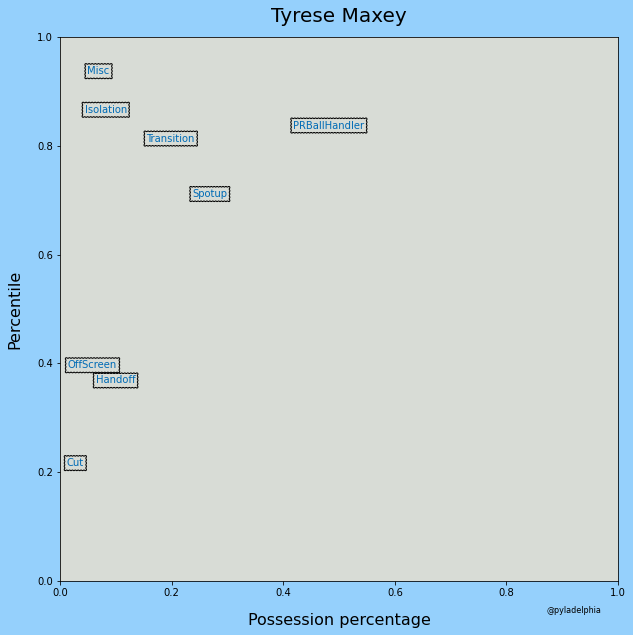

In [12]:
fig, ax = plt.subplots(figsize=(10,10))

#define fonts - not working 
titlefont = {'fontname':'Comic Sans MS'}
plotfont = {'fontname':'Helvetica'}

ax.set_xlim(left = 0, right = 1)

ax.set_title(player,fontsize=20,pad=15,**titlefont)
ax.set_xlabel('Possession percentage',fontsize=16,labelpad=15,**plotfont)
ax.set_ylabel('Percentile',fontsize=16,labelpad=15,**plotfont)


for i in range(len(player_profile)):
    ax.text(player_profile.POSS_PCT[i],player_profile.PERCENTILE[i], player_profile.PlayType[i], color='#006BB6', 
        bbox=dict(facecolor='none', edgecolor='black',boxstyle='roundtooth'))
    
    
plt.figtext(.8,.08, '@pyladelphia', fontsize = 8)

ax.set_facecolor('xkcd:light grey')
fig.set_facecolor('xkcd:light blue')

plt.show()
#plt.savefig('maxey.png',dpi=400)